In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from datetime import datetime

In [467]:
test_data={'a':[1,0,8,5],
          'b':[36,2,0,6],
          'c':[2,8,100,0],
          'd':[7,8,9,50]}
df=pd.DataFrame(test_data,columns=['a','b','c','d'])
df=df.reset_index()
print(df)
results=pd.melt(df,id_vars='index',var_name='header',value_name='score')
filter=results['score']!=0
print(results[filter].sort_values(by=['index','score'],ascending=[True,False]))

   index  a   b    c   d
0      0  1  36    2   7
1      1  0   2    8   8
2      2  8   0  100   9
3      3  5   6    0  50
    index header  score
4       0      b     36
12      0      d      7
8       0      c      2
0       0      a      1
9       1      c      8
13      1      d      8
5       1      b      2
10      2      c    100
14      2      d      9
2       2      a      8
15      3      d     50
7       3      b      6
3       3      a      5


In [67]:
df = pd.DataFrame({'Gene': ['419', '1036', '1167', '1629'],
              'Myob': [0.261, 1.010, -0.534, 1.412],
              'Myob_Ind': [0.901, 0.525, 2.588, 1.825],
              'Cluster': [0, 0, 0, 0]})

results=pd.melt(df,id_vars=['Gene','Cluster'],var_name='Cell Lines',value_name='Z-Score')
print(results.sort_values(by='Gene',ascending=[False]))


   Gene  Cluster Cell Lines  Z-Score
0   419        0       Myob    0.261
4   419        0   Myob_Ind    0.901
3  1629        0       Myob    1.412
7  1629        0   Myob_Ind    1.825
2  1167        0       Myob   -0.534
6  1167        0   Myob_Ind    2.588
1  1036        0       Myob    1.010
5  1036        0   Myob_Ind    0.525


In [103]:
USER =[1,1,1,1,1,1,2]
PACKAGE=[1,1,2,1,2,3,3]
df=pd.DataFrame({'user':USER,'package':PACKAGE})
print(df)
results=df.groupby(['user','package']).size()
results=results.sort_values(ascending=False)
#results=pd.melt(results,id_vars=['user','package'])
print(results)
results=results.unstack(level='package').fillna(0)
results=results.rename(columns={1:'First',2:'Second',3:'Third'})
print(results)

   user  package
0     1        1
1     1        1
2     1        2
3     1        1
4     1        2
5     1        3
6     2        3
user  package
1     1          3
      2          2
2     3          1
1     3          1
dtype: int64
package  First  Second  Third
user                         
1          3.0     2.0    1.0
2          0.0     0.0    1.0


In [217]:
Title =['Coach','teacher','driver','Coach','teacher','driver'] 
Name=['Bob','sam','mark','tina','kate','frank']
Count=[4,5,8,10,3,2]
df=pd.DataFrame({'title':Title,'name':Name,'count':Count})
df=df.set_index(['title','name'])
grouped=df.groupby(['title','name'])['count'].sum()
print(grouped)
#grouped=grouped.T
#grouped=grouped.unstack(level=0)
#print(grouped.index,grouped.values)
index=0
type_list=[]
name_list=[]
for item in grouped.index:
    print(item[0],str(item[1])+ ' ' +str(grouped.values[index]))
    type_list.append(item[0])
    name_list.append(str(item[1])+ ' ' +str(grouped.values[index]))
    index+=1

df=pd.DataFrame({'type':type_list,'name':name_list})
print(df)
#df=df.set_index('type')
#print(pd.pivot_table(df,index='name',columns='type',values='value'))

#print(fp)
#print(df.unstack(level='title'))

title    name 
Coach    Bob       4
         tina     10
driver   frank     2
         mark      8
teacher  kate      3
         sam       5
Name: count, dtype: int64
Coach Bob 4
Coach tina 10
driver frank 2
driver mark 8
teacher kate 3
teacher sam 5
      type     name
0    Coach    Bob 4
1    Coach  tina 10
2   driver  frank 2
3   driver   mark 8
4  teacher   kate 3
5  teacher    sam 5


In [256]:
df = pd.DataFrame(index=['2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24', '2016-11-25'],
                  columns=pd.MultiIndex.from_product([list('AB'), list('ab')]),
                  data=np.array([[2,3,5,6,6], [1,4,2,3,3], [3,1,1,1,0], [0,0,6,5,2]]).T)

columns=df.columns.levels[0]
print(columns)

print(df.loc['2016-11-22',(columns,'a')])

Index(['A', 'B'], dtype='object')
A  a    3
B  a    1
Name: 2016-11-22, dtype: int32


  weekday    city  bread  butter
0     Sun  Austin    139      20
1     Sun  Dallas    237      45
2     Mon  Austin    326      70
3     Mon  Dallas    456      98
         city  bread  butter
weekday                     
Mon         2      2       2
Sun         2      2       2
weekday
Mon    782
Sun    376
Name: bread, dtype: int64
         bread  butter
weekday               
Mon        782     168
Sun        376      65
                bread  butter
city   weekday               
Austin Mon        326      70
       Sun        139      20
Dallas Mon        456      98
       Sun        237      45
['Sun' 'Mon']
        bread  butter
city                 
Austin    326      70
Dallas    456      98
Data Range              bread     butter
        data_range data_range
weekday                      
Mon            130         28
Sun             98         25


aggregate by column           bread  butter
weekday               
Mon        782      28
Sun        376      25


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


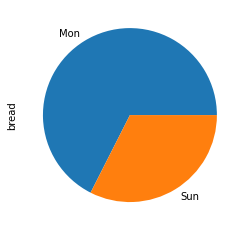

In [280]:
sales=pd.DataFrame({
    'weekday':['Sun','Sun','Mon','Mon'],
    'city':['Austin','Dallas','Austin','Dallas'],
    'bread':[139,237,326,456],
    'butter':[20,45,70,98]
    
})
print(sales)
print(sales.groupby('weekday').count())
print(sales.groupby('weekday')['bread'].sum())
sales.groupby('weekday')['bread'].sum().plot.pie()
print(sales.groupby('weekday')['bread','butter'].sum())

print(sales.groupby(['city','weekday']).mean())

print(sales['weekday'].unique())

sales['weekday']=sales['weekday'].astype('category')

print(sales.groupby('city')[['bread','butter']].max())



def data_range(series):
    return series.max() - series.min()


print("Data Range", sales.groupby('weekday')[['bread','butter']].agg([data_range]))


print("\n\naggregate by column ", sales.groupby('weekday')[['bread','butter']].agg({'bread':'sum','butter':data_range}))


In [269]:
customers=pd.Series(['Dave','Alice','Bob','Alice'])
print(customers)

0     Dave
1    Alice
2      Bob
3    Alice
dtype: object


In [303]:
index=[45,46,47,51,52]
price=[3909.0,3908.75,3908.50,3907.75,3907.5]
count=[8,8,8,8,8]

df=pd.DataFrame({'index':index,'price':price,'count':count})
print(df)
df['diff']=df['index'].diff().fillna(0)

print(df)
result_list=[[]]

seq=0
for row in df.itertuples():
    index=row[1]
    diff=row[4]
    if diff<=1:
        result_list[seq].append(index)
    else:
        seq+=1
        result_list.insert(1,[index])

print(result_list)    


   index    price  count
0     45  3909.00      8
1     46  3908.75      8
2     47  3908.50      8
3     51  3907.75      8
4     52  3907.50      8
   index    price  count  diff
0     45  3909.00      8   0.0
1     46  3908.75      8   1.0
2     47  3908.50      8   1.0
3     51  3907.75      8   4.0
4     52  3907.50      8   1.0
[[45, 46, 47], [51, 52]]


In [398]:
columns = ['A', 'B', 'C', 'D']
records = [
    ['foo', 'one', 0.162003, 0.087469],
    ['bar', 'one', -1.156319, -1.5262719999999999],
    ['foo', 'two', 0.833892, -1.666304],     
    ['bar', 'three', -2.026673, -0.32205700000000004],
    ['foo', 'two', 0.41145200000000004, -0.9543709999999999],
    ['bar', 'two', 0.765878, -0.095968],
    ['foo', 'one', -0.65489, 0.678091],
    ['foo', 'three', -1.789842, -1.130922]
]
df = pd.DataFrame.from_records(records, columns=columns)
print("DataFrame\n",df)

standardize=df.groupby('A')['C','D'].transform(zscore)
print("\nC + D Zscore\n",standardize)
outliersC= (standardize['C'] <-1.1) | (standardize['C']>1.1)
outliersD= (standardize['D'] <-1.1) | (standardize['D']>1.1)

results=df[outliersC | outliersD]
print("\nC + D filtered Zscore\n",results)

splitting = df.groupby('A')

#for group_name, group in splitting:
#    group['Diff']=group['C']-group['D']
#    print(group_name,group['Diff'])

    
#splitting['Diff']=
#splitting.apply(lambda series: [print(x[2]-x[3]) for x in series.values])    
def column_difference(gr):
    return gr['C']-gr['D']

grouped=splitting.apply(column_difference)
print(grouped)
    


DataFrame
      A      B         C         D
0  foo    one  0.162003  0.087469
1  bar    one -1.156319 -1.526272
2  foo    two  0.833892 -1.666304
3  bar  three -2.026673 -0.322057
4  foo    two  0.411452 -0.954371
5  bar    two  0.765878 -0.095968
6  foo    one -0.654890  0.678091
7  foo  three -1.789842 -1.130922

C + D Zscore
           C         D
0  0.398046  0.801292
1 -0.300518 -1.398845
2  1.121882 -1.251188
3 -1.046514  0.519353
4  0.666781 -0.417997
5  1.347032  0.879491
6 -0.482004  1.492511
7 -1.704704 -0.624618

C + D filtered Zscore
      A      B         C         D
1  bar    one -1.156319 -1.526272
2  foo    two  0.833892 -1.666304
5  bar    two  0.765878 -0.095968
6  foo    one -0.654890  0.678091
7  foo  three -1.789842 -1.130922
A     
bar  1    0.369953
     3   -1.704616
     5    0.861846
foo  0    0.074534
     2    2.500196
     4    1.365823
     6   -1.332981
     7   -0.658920
dtype: float64


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


In [493]:
#def zscore(series):
#    #print(series[['f1','f2','f3']])
#    return (series - series.mean())/series.std()

F1=[0.032111,0.068824,0.076838,0.020903, 0.032807, -0.014995, -0.002233]
F2=[0.063330,0.158614,0.034735,0.154653,1.099790,0.814866,1.954578]
F3=[0.027733,0.032489,0.020062,0.056860,0.233216,0.498432,0.727823]
Date=['8/31/2014','9/30/2014','10/31/2014','11/30/2014','8/31/2014','9/30/2014','10/31/2014']
Name=['XYZ','XYZ','XYZ','XYZ','Acme','Acme','Acme']

df=pd.DataFrame({'f1':F1,'f2':F2,'f3':F3,'date':Date,'name':Name})
df['date']=pd.to_datetime(df['date'],errors='coerce')
df['year']=df['date'].dt.strftime('%Y')
df['f1']=df['f1'].astype(np.float)
df['f2']=df['f2'].astype(np.float)
df['f3']=df['f3'].astype(np.float)
print(df)
splitting=df.groupby(['year','name'])

standardized=splitting['f1','f2','f3'].transform(zscore)
print("\n zscores for f1,f2,f3\n", standardized)

outliers=(standardized['f1']>1)
print("\n outliers \n", df.loc[outliers])

#for group_name, group in splitting:
#    print(group_name,group[['f1','f2','f3']])


         f1        f2        f3       date  name  year
0  0.032111  0.063330  0.027733 2014-08-31   XYZ  2014
1  0.068824  0.158614  0.032489 2014-09-30   XYZ  2014
2  0.076838  0.034735  0.020062 2014-10-31   XYZ  2014
3  0.020903  0.154653  0.056860 2014-11-30   XYZ  2014
4  0.032807  1.099790  0.233216 2014-08-31  Acme  2014
5 -0.014995  0.814866  0.498432 2014-09-30  Acme  2014
6 -0.002233  1.954578  0.727823 2014-10-31  Acme  2014

 zscores for f1,f2,f3
          f1        f2        f3
0 -0.741823 -0.721383 -0.476007
1  0.809296  1.018644 -0.130533
2  1.147886 -1.243571 -1.033224
3 -1.215359  0.946310  1.639764
4  1.366408 -0.392237 -1.253219
5 -0.998952 -0.980577  0.059088
6 -0.367457  1.372814  1.194131

 outliers 
          f1        f2        f3       date  name  year
2  0.076838  0.034735  0.020062 2014-10-31   XYZ  2014
4  0.032807  1.099790  0.233216 2014-08-31  Acme  2014


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [491]:
df=pd.DataFrame([[1, 10, 14], [1, 12, 14], [1, 20, 12], [1, 25, 12], [2, 18, 12], [2, 30, 14], [2, 4, 12], [2, 10, 14]], columns = ['A', 'B', 'C'])
print(df.groupby(['A','B']).transform(zscore))

    C
0 NaN
1 NaN
2 NaN
3 NaN
4 NaN
5 NaN
6 NaN
7 NaN


    calltype  district  gender       complaint  age  area  severity
0          0         0       1      Chest Pain   28     0         3
1          0         1       1   Heart Problem   50     0         2
2          0         2       1  Cardiac Arrest   76     0         1
3          1         3       1   Heart Problem   45     1         2
4          0         4       0  Cardiac Arrest   52     1         1
5          0         0       1      Chest Pain   34     1         3
6          0         1       1  Cardiac Arrest   44     1         1
7          0         2       0   Heart Problem   55     0         2
8          1         3       0   Heart Problem   86     0         2
9          1         4       1   Heart Problem   65     0         2
10         0         0       1   Heart Problem   60     1         2
11         1         1       1      Chest Pain   36     1         3
12         0         2       1   Heart Problem   45     1         2
13         0         3       1      Chest Pain  

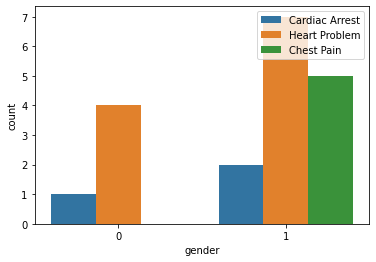

Gender 0=Female 1=Male
           age           
gender       0          1
severity                 
1         52.0  60.000000
2         61.5  57.857143
3          NaN  41.800000

 More males had severe heart problems


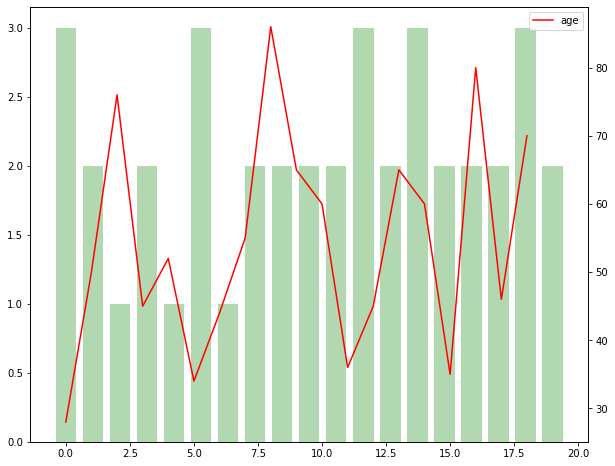


Ages 30-40 had high frequencies of cardiac arrest

K-Means Clustering

674.3571428571429
[0 1 2 1 2 2 2 1 0 1 0 0 2 0 0 0 0 2 2]


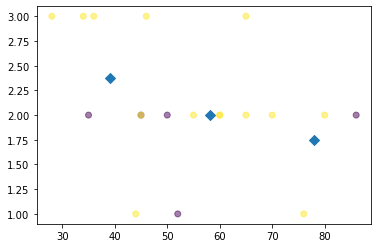


TSNE


PCA

(19, 3)


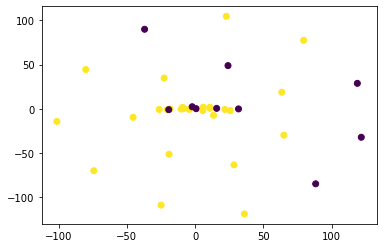

In [4]:
from sklearn.decomposition import PCA
from scipy.cluster.vq import vq, whiten
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

calltype=['Emergency','Emergency','Emergency','Hosp to Hosp','Emergency','Emergency','Emergency','Emergency','Hosp to Hosp','Hosp to Hosp','Emergency','Hosp to Hosp','Emergency','Emergency','Emergency','Emergency','Emergency','Emergency','Emergency']
district=['District 1','District 2','District 3', 'District 4','District 5','District 1','District 2','District 3','District 4','District 5','District 1','District 2','District 3','District 4','District 5', 'District 1','District 2','District 3','District 4']
gender=['Male','Male','Male','Male','Female','Male','Male','Female','Female','Male','Male','Male','Male','Male','Male','Female','Male','Male','Female']
complaint=['Chest Pain','Heart Problem','Cardiac Arrest','Heart Problem','Cardiac Arrest','Chest Pain','Cardiac Arrest','Heart Problem','Heart Problem','Heart Problem','Heart Problem','Chest Pain','Heart Problem','Chest Pain','Heart Problem','Heart Problem','Heart Problem','Chest Pain','Heart Problem']
age=[28,50,76,45,52,34,44,55,86,65,60,36,45,65,60,35,80,46,70]
area=['Rural','Rural','Rural','Urban','Urban','Urban','Urban','Rural','Rural','Rural','Urban','Urban','Urban','Rural','Rural','Urban','Rural','Urban','Urban']
df=pd.DataFrame({'calltype':calltype,'district':district,'gender':gender,'complaint':complaint,'age':age,'area':area})
df['severity']=df['complaint'].apply(lambda row: 3 if row=='Chest Pain' else 2 if row=='Heart Problem' else 1 if row=='Cardiac Arrest' else 0)

encoder=LabelEncoder()
df['district']=encoder.fit(df['district']).transform(df['district'])
df['gender']=encoder.fit(df['gender']).transform(df['gender'])
df['area']=encoder.fit(df['area']).transform(df['area'])
df['calltype']=encoder.fit(df['calltype']).transform(df['calltype'])
print(df)

#plt.plot(data=df,x='calltype',y='severity',c='gender')

sns.countplot(x='gender',hue='severity',data=df)
plt.legend(['Cardiac Arrest','Heart Problem','Chest Pain'])
plt.show()

print('Gender 0=Female 1=Male')
fp=df.pivot_table(index=['severity'],columns=['gender'],values=['age'],aggfunc='mean')
print(fp)

print("\n More males had severe heart problems")

#print(df.groupby(['gender','severity'])['age'].size())
fig,ax=plt.subplots(figsize=(10,8))
x=np.linspace(0,len(df),len(df))
ax.bar(x,df['severity'],alpha=0.3,color='green')
twin_ax=ax.twinx()
df[['age']].plot(ax=twin_ax, c='red')
plt.show()

print('\nAges 30-40 had high frequencies of cardiac arrest')

print("\nK-Means Clustering\n")
labels=df['gender']
xs=df['age']
ys=df['severity']
points=np.column_stack((xs,ys))
model = KMeans(n_clusters=3)
model.fit(points)
print(model.inertia_)
new_points=np.random.permutation(points)
new_labels = model.predict(new_points)
print(new_labels)
xs = new_points[:,0]
ys = new_points[:,1]
plt.clf()
# Make a scatter plot of xs and ys, using labels to define the colors
#_=plt.scatter(xs,ys,c=labels, alpha=0.5)
_=plt.scatter(xs,ys,c=labels, alpha=0.5)
# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
_=plt.scatter(centroids_x,centroids_y, marker='D',s=50)
plt.show()

print("\nTSNE\n")
model=TSNE(learning_rate=100)
X=df[['calltype','district','gender','age','area','severity']]
transformed=model.fit_transform(X)

xs=transformed[:,0]
ys=transformed[:,1]

plt.scatter(xs,ys,c=labels)
plt.show

print("\nPCA\n")
pca=PCA(n_components=3)
pca.fit(X)

transformed=pca.transform(X)
print(transformed.shape)

xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=labels)
plt.show()


In [6]:
dt=datetime(year=2017,
    month=10,
    day=1,
    hour=15,
    minute=23,
    second=25,
    microsecond=500000)
print(dt)
dt=dt.replace(year=2018)
print(dt.year)

dt=pd.to_datetime("2021-02-19")
print(type(dt))

2017-10-01 15:23:25.500000
2018
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [14]:
ID=[171,171,182,182]
Report=[11,12,13,14]
DaysLeft=[5,9,1,2]

df=pd.DataFrame({'id':ID,'report':Report,'daysleft':DaysLeft})
print(df)
df=df.sort_values(by="daysleft",ascending=True)\
    .assign(order=lambda x: x.groupby("id").cumcount())\
    .sort_values(by=['order','daysleft'])

print(df)

    id  report  daysleft
0  171      11         5
1  171      12         9
2  182      13         1
3  182      14         2
    id  report  daysleft  order
2  182      13         1      0
0  171      11         5      0
3  182      14         2      1
1  171      12         9      1
